
🔵 Step 4: Sentences extracted:
1: Artificial Intelligence (AI) is revolutionizing industries across the globe.
2: Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.
3: Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots.
4: The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management.
5: Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
6: Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
7: Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.

🔵 Step 5: TF-IDF matrix shape: (7, 87)


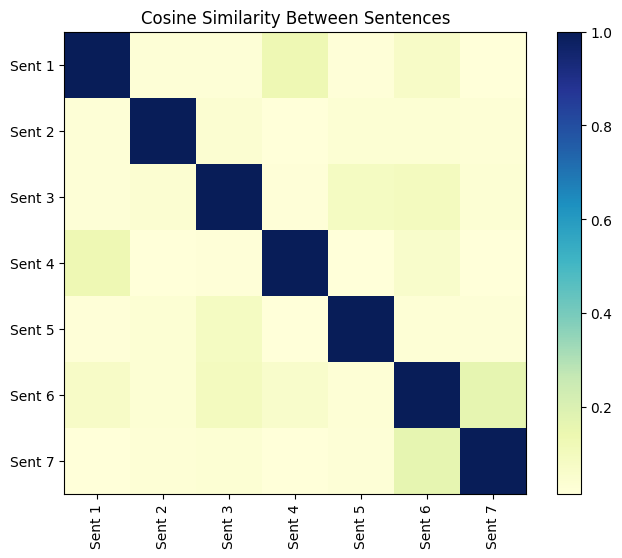


🔵 Step 9: Ranked Sentences:

0.1547 → Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
0.1438 → Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots.
0.1431 → Artificial Intelligence (AI) is revolutionizing industries across the globe.
0.1415 → Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.
0.1409 → The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management.
0.1388 → Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
0.1372 → Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.

🔵 Step 10: Top 3 Sentences Selected for Summary:
1: Research organizations and governments a

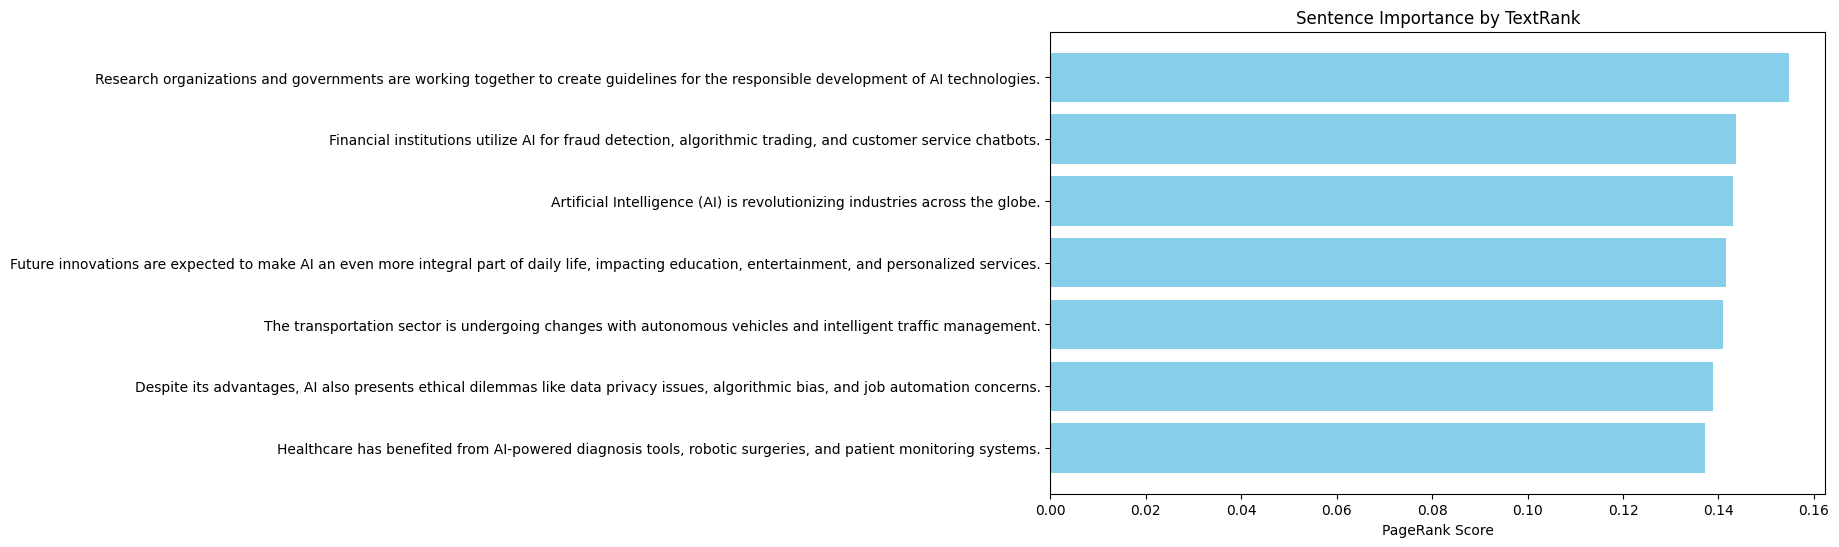

In [ ]:
# --------------------------------------------
# TextRank-Based Extractive Summarization
# --------------------------------------------

import spacy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 2: Load SpaCy Model
nlp = spacy.load('en_core_web_sm')

# Step 3: Same Example Text
text = """
Artificial Intelligence (AI) is revolutionizing industries across the globe. 
Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.
Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots. 
The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management. 
Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.
"""

# Step 4: Sentence Tokenization
doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]

print("\n🔵 Step 4: Sentences extracted:")
for idx, sent in enumerate(sentences):
    print(f"{idx+1}: {sent}")

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

print("\n🔵 Step 5: TF-IDF matrix shape:", X.shape)

# Step 6: Cosine Similarity
similarity_matrix = cosine_similarity(X)

# Visualize similarity matrix
plt.figure(figsize=(8,6))
plt.imshow(similarity_matrix, interpolation='nearest', cmap='YlGnBu')
plt.colorbar()
plt.title("Cosine Similarity Between Sentences")
plt.xticks(ticks=range(len(sentences)), labels=[f"Sent {i+1}" for i in range(len(sentences))], rotation=90)
plt.yticks(ticks=range(len(sentences)), labels=[f"Sent {i+1}" for i in range(len(sentences))])
plt.show()

# Step 7: Build Graph
nx_graph = nx.from_numpy_array(similarity_matrix)

# Step 8: Apply PageRank
scores = nx.pagerank(nx_graph)

# Step 9: Rank Sentences
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

print("\n🔵 Step 9: Ranked Sentences:\n")
for score, sent in ranked_sentences:
    print(f"{score:.4f} → {sent}")

# Step 10: Select Top 3 Sentences
top_sentences = [sent for score, sent in ranked_sentences[:3]]

print("\n🔵 Step 10: Top 3 Sentences Selected for Summary:")
for idx, sent in enumerate(top_sentences):
    print(f"{idx+1}: {sent}")

# Step 11: Final Summary
summary = ' '.join(top_sentences)

print("\n🔵 Final Extracted Summary:")
print(summary)

# Step 12: Optional Visualization of Sentence Importance
ranked_df = pd.DataFrame(ranked_sentences, columns=['PageRank Score', 'Sentence'])

plt.figure(figsize=(10,6))
plt.barh(ranked_df['Sentence'], ranked_df['PageRank Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('PageRank Score')
plt.title('Sentence Importance by TextRank')
plt.show()
